<a href="https://colab.research.google.com/github/PaulaFlavia/CartaoVisitas/blob/master/Redu%C3%A7%C3%A3o%20de%20dimensionalidade%20de%20imagens%20255%20tons%20de%20cinza%20e%20bin%C3%A1ria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from PIL import Image
from google.colab import files

# Carregando a imagem colorida
uploaded = files.upload()
img_color = Image.open(next(iter(uploaded)))

# Convertendo para tons de cinza
def rgb_to_gray(pixel):
    r, g, b = pixel
    return int(0.2989 * r + 0.5870 * g + 0.1140 * b)

width, height = img_color.size
img_gray = Image.new('L', (width, height))

for x in range(width):
    for y in range(height):
        pixel = img_color.getpixel((x, y))
        gray = rgb_to_gray(pixel)
        img_gray.putpixel((x, y), gray)

# Convertendo para imagem binária
def binarize_image(img_gray, threshold):
    width, height = img_gray.size
    img_bin = Image.new('1', (width, height))

    for x in range(width):
        for y in range(height):
            gray = img_gray.getpixel((x, y))
            if gray < threshold:
                img_bin.putpixel((x, y), 0)
            else:
                img_bin.putpixel((x, y), 255)

    return img_bin

# Aplicando a binarização
img_bin = binarize_image(img_gray, 128)

# Salvando a imagem binária
img_bin.save('imagem_binaria.png')


Saving imagem_colorida.jpg to imagem_colorida.jpg


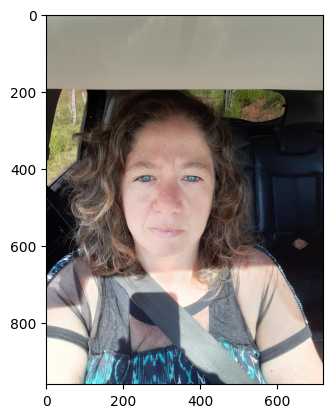

In [4]:
import matplotlib.pyplot as plt

plt.imshow(img_color)
plt.show()


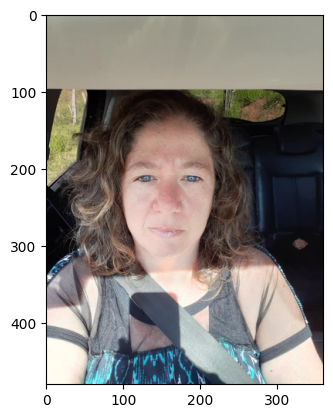

In [9]:
width, height = img_color.size
img_color_reduced = img_color.resize((width//2, height//2))

plt.imshow(img_color_reduced)
plt.show()

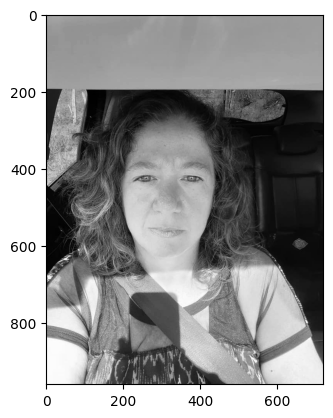

In [7]:
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255)
plt.show()


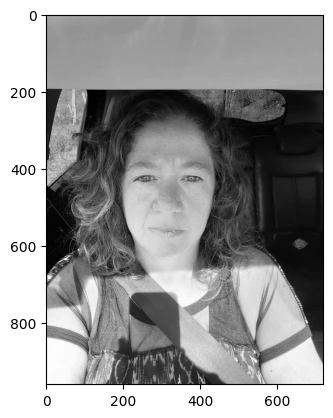

In [8]:
import numpy as np

gray_array = np.array(img_gray)
gray_min = gray_array.min()
gray_max = gray_array.max()

plt.imshow(img_gray, cmap='gray', vmin=gray_min, vmax=gray_max)
plt.show()


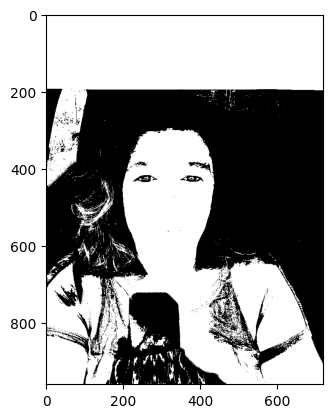

In [10]:
gray_array = np.array(img_gray)
threshold = 127
binary_array = np.where(gray_array < threshold, 0, 255)
img_bin = Image.fromarray(binary_array.astype(np.uint8))
img_bin.save('imagem_binaria.png')

plt.imshow(img_bin, cmap='gray')
plt.show()


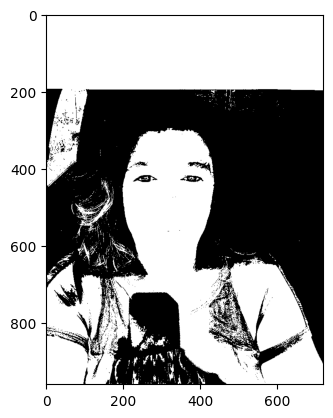

In [5]:
img_bin = Image.open('imagem_binaria.png')

plt.imshow(img_bin, cmap='gray')
plt.show()
